<a href="https://colab.research.google.com/github/CEOJO/Exploratoray-Data-Analysis-in-Pandas/blob/main/Automating_Crypto_Website_API_Pull_Using_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)


In [ ]:
import pandas as pd


#This allows you to see all the columns, not just like 15
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

<ipython-input-7-7ca7f5bd7fbb>:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df['timestamp'] = pd.to_datetime('now')


,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11005,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968360e+07,1.968360e+07,False,NaN,1,NaN,NaN,None,2024-04-15T20:00:00.000Z,63344.317983,4.596227e+10,-28.8789,0.241973,-1.332859,-11.697833,-5.319424,21.670785,46.776042,1.246844e+12,53.8139,1.330231e+12,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
1,1027,Ethereum,ETH,ethereum,8810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200695e+08,1.200695e+08,True,NaN,2,NaN,NaN,None,2024-04-15T19:59:00.000Z,3107.296142,2.298343e+10,-35.7408,1.569806,1.034309,-15.928007,-13.605183,9.487562,20.716687,3.730914e+11,16.1027,3.730914e+11,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
2,825,Tether USDt,USDT,tether,82795,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.077281e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-15T19:59:00.000Z,1.000386,9.138281e+10,-32.9162,-0.019566,0.007421,0.026071,0.089786,-0.022795,0.060977,1.077696e+11,4.6513,1.109838e+11,None,2024-04-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-15 20:01:34.199214
3,1839,BNB,BNB,bnb,2146,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495340e+08,1.495340e+08,False,NaN,4,NaN,NaN,None,2024-04-15T19:59:00.000Z,556.592773,1.562736e+09,-38.8166,0.752338,0.809391,-5.491147,-4.383453,56.251424,76.774347,8.322952e+10,3.5922,8.322952e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
4,5426,Solana,SOL,solana,652,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.465989e+08,5.739657e+08,True,NaN,5,NaN,NaN,None,2024-04-15T19:59:00.000Z,138.563114,6.246159e+09,-38.0738,1.815176,-2.193692,-22.682180,-22.757814,21.458644,43.167596,6.188214e+10,2.6699,7.953047e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
5,3408,USDC,USDC,usd-coin,18463,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.233107e+10,3.233107e+10,False,NaN,6,NaN,NaN,None,2024-04-15T19:59:00.000Z,0.999903,1.035109e+10,-30.6398,-0.005681,-0.011180,-0.018144,0.003448,0.001793,-0.024550,3.232792e+10,1.3953,3.232792e+10,None,2024-04-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-15 20:01:34.199214
6,52,XRP,XRP,xrp,1299,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.511990e+10,9.998770e+10,False,NaN,7,NaN,NaN,None,2024-04-15T20:00:00.000Z,0.498512,2.448642e+09,-46.0261,1.882651,1.666033,-20.212023,-17.784681,-10.008243,-13.743912,2.747792e+10,1.1859,4.985117e+10,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
7,11419,Toncoin,TON,toncoin,277,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470977e+09,5.105285e+09,True,NaN,8,3.414167e+09,2.303564e+10,None,2024-04-15T19:59:00.000Z,6.747075,6.268120e+08,-29.3251,2.398907,2.657179,8.071189,89.852593,204.979761,177.056019,2.341894e+10,1.0108,3.444574e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
8,74,Dogecoin,DOGE,dogecoin,953,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [ ]:
def api_runner():
  url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
  parameters = {
  'start':'1',
  'limit':'10',
  'convert':'USD'
  }
  headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
  }

  session = Session()
  session.headers.update(headers)

  try:
    response = session.get(url, params=parameters)
    data = json.loads(response.text)
  #print(data)
  except (ConnectionError, Timeout, TooManyRedirects) as e:
    print(e)
  import pandas as pd
  df2 = pd.json_normalize(data['data'])
  df2['timestamp'] = pd.to_datetime('now')
  df


  if not os.path.isfile(r'C:\Users\clementinaojo\Downloads\API.csv'):
    df.to_csv(r'C:\Users\clementinaojo\Downloads', header='column_names')
  else:
    df.to_csv(r'C:\Users\clementinaojo\Downloads', header=False, mode='a')

In [ ]:
import os
from time import time
from time import sleep

for i in range(333): # for loop
    api_runner() # call API
    print('API runner completed successfully') # tell us it ran
    sleep(60) #sleep for 1 min
exit()

<ipython-input-8-897d89a27f10>:25: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  df2['timestamp'] = pd.to_datetime('now')


API runner completed successfully


KeyboardInterrupt: 

In [ ]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11005,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.968360e+07,1.968360e+07,False,NaN,1,NaN,NaN,None,2024-04-15T20:00:00.000Z,63344.317983,4.596227e+10,-28.8789,0.241973,-1.332859,-11.697833,-5.319424,21.670785,46.776042,1.246844e+12,53.8139,1.330231e+12,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
1,1027,Ethereum,ETH,ethereum,8810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.200695e+08,1.200695e+08,True,NaN,2,NaN,NaN,None,2024-04-15T19:59:00.000Z,3107.296142,2.298343e+10,-35.7408,1.569806,1.034309,-15.928007,-13.605183,9.487562,20.716687,3.730914e+11,16.1027,3.730914e+11,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
2,825,Tether USDt,USDT,tether,82795,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,1.077281e+11,1.109410e+11,True,NaN,3,NaN,NaN,None,2024-04-15T19:59:00.000Z,1.000386,9.138281e+10,-32.9162,-0.019566,0.007421,0.026071,0.089786,-0.022795,0.060977,1.077696e+11,4.6513,1.109838e+11,None,2024-04-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-15 20:01:34.199214
3,1839,BNB,BNB,bnb,2146,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.495340e+08,1.495340e+08,False,NaN,4,NaN,NaN,None,2024-04-15T19:59:00.000Z,556.592773,1.562736e+09,-38.8166,0.752338,0.809391,-5.491147,-4.383453,56.251424,76.774347,8.322952e+10,3.5922,8.322952e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
4,5426,Solana,SOL,solana,652,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.465989e+08,5.739657e+08,True,NaN,5,NaN,NaN,None,2024-04-15T19:59:00.000Z,138.563114,6.246159e+09,-38.0738,1.815176,-2.193692,-22.682180,-22.757814,21.458644,43.167596,6.188214e+10,2.6699,7.953047e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
5,3408,USDC,USDC,usd-coin,18463,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.233107e+10,3.233107e+10,False,NaN,6,NaN,NaN,None,2024-04-15T19:59:00.000Z,0.999903,1.035109e+10,-30.6398,-0.005681,-0.011180,-0.018144,0.003448,0.001793,-0.024550,3.232792e+10,1.3953,3.232792e+10,None,2024-04-15T19:59:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-15 20:01:34.199214
6,52,XRP,XRP,xrp,1299,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.511990e+10,9.998770e+10,False,NaN,7,NaN,NaN,None,2024-04-15T20:00:00.000Z,0.498512,2.448642e+09,-46.0261,1.882651,1.666033,-20.212023,-17.784681,-10.008243,-13.743912,2.747792e+10,1.1859,4.985117e+10,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
7,11419,Toncoin,TON,toncoin,277,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3.470977e+09,5.105285e+09,True,NaN,8,3.414167e+09,2.303564e+10,None,2024-04-15T19:59:00.000Z,6.747075,6.268120e+08,-29.3251,2.398907,2.657179,8.071189,89.852593,204.979761,177.056019,2.341894e+10,1.0108,3.444574e+10,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
8,74,Dogecoin,DOGE,dogecoin,953,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-e

In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)
#change large numbers in df written in scientific notation to whole numbers

In [ ]:

df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11005,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19683600.00000,19683600.00000,False,NaN,1,NaN,NaN,None,2024-04-15T20:00:00.000Z,63344.31798,45962267044.54781,-28.87890,0.24197,-1.33286,-11.69783,-5.31942,21.67078,46.77604,1246844217451.66553,53.81390,1330230677644.59009,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
1,1027,Ethereum,ETH,ethereum,8810,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120069475.89100,120069475.89100,True,NaN,2,NaN,NaN,None,2024-04-15T19:59:00.000Z,3107.29614,22983426151.55747,-35.74080,1.56981,1.03431,-15.92801,-13.60518,9.48756,20.71669,373091419249.23505,16.10270,373091419249.23999,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
2,825,Tether USDt,USDT,tether,82795,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,107728051606.65468,110941048614.43338,True,NaN,3,NaN,NaN,None,2024-04-15T19:59:00.000Z,1.00039,91382814063.53329,-32.91620,-0.01957,0.00742,0.02607,0.08979,-0.02279,0.06098,107769591260.33994,4.65130,110983827191.32001,None,2024-04-15T19:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-04-15 20:01:34.199214
3,1839,BNB,BNB,bnb,2146,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,149533951.77417,149533951.77417,False,NaN,4,NaN,NaN,None,2024-04-15T19:59:00.000Z,556.59277,1562736371.44658,-38.81660,0.75234,0.80939,-5.49115,-4.38345,56.25142,76.77435,83229516894.84012,3.59220,83229516894.84000,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
4,5426,Solana,SOL,solana,652,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,446598915.85916,573965667.68916,True,NaN,5,NaN,NaN,None,2024-04-15T19:59:00.000Z,138.56311,6246159012.02549,-38.07380,1.81518,-2.19369,-22.68218,-22.75781,21.45864,43.16760,61882136698.42968,2.66990,79530470511.37000,None,2024-04-15T19:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
5,3408,USDC,USDC,usd-coin,18463,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32331068096.07947,32331068096.07947,False,NaN,6,NaN,NaN,None,2024-04-15T19:59:00.000Z,0.99990,10351093070.67197,-30.63980,-0.00568,-0.01118,-0.01814,0.00345,0.00179,-0.02455,32327916094.20177,1.39530,32327916094.20000,None,2024-04-15T19:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-04-15 20:01:34.199214
6,52,XRP,XRP,xrp,1299,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55119895152.00000,99987695075.00000,False,NaN,7,NaN,NaN,None,2024-04-15T20:00:00.000Z,0.49851,2448642406.43521,-46.02610,1.88265,1.66603,-20.21202,-17.78468,-10.00824,-13.74391,27477915240.85550,1.18590,49851174725.72000,None,2024-04-15T20:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-04-15 20:01:34.199214
7,11419,Toncoin,TON,toncoin,277,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3470977428.21059,5105284768.65166,True,NaN,8,3414166606.00000,23035636742.26924,None,2024-04-15T19:59:00.000Z,6.74707,626811980.76028,-29.32510,2.39891,2.65718,8.07119,89.85259,204.97976,177.05602,23418943597.05862,1.01080,34445737120.69000,

In [ ]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h',	'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d']].mean()

In [ ]:
df4=df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.24197
             quote.USD.percent_change_24h    -1.33286
             quote.USD.percent_change_7d    -11.69783
             quote.USD.percent_change_30d    -5.31942
Ethereum     quote.USD.percent_change_1h      1.56981
             quote.USD.percent_change_24h     1.03431
             quote.USD.percent_change_7d    -15.92801
             quote.USD.percent_change_30d   -13.60518
Tether USDt  quote.USD.percent_change_1h     -0.01957
             quote.USD.percent_change_24h     0.00742
             quote.USD.percent_change_7d      0.02607
             quote.USD.percent_change_30d     0.08979
BNB          quote.USD.percent_change_1h      0.75234
             quote.USD.percent_change_24h     0.80939
             quote.USD.percent_change_7d     -5.49115
             quote.USD.percent_change_30d    -4.38345
Solana       quote.USD.percent_change_1h      1.81518
             quote.USD.percent_change_24

In [ ]:
type(df4) #stacking the df changed it from a df to a series


pandas.core.series.Series

In [ ]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.24197
            quote.USD.percent_change_24h  -1.33286
            quote.USD.percent_change_7d  -11.69783
            quote.USD.percent_change_30d  -5.31942
Ethereum    quote.USD.percent_change_1h    1.56981
            quote.USD.percent_change_24h   1.03431
            quote.USD.percent_change_7d  -15.92801
            quote.USD.percent_change_30d -13.60518
Tether USDt quote.USD.percent_change_1h   -0.01957
            quote.USD.percent_change_24h   0.00742
            quote.USD.percent_change_7d    0.02607
            quote.USD.percent_change_30d   0.08979
BNB         quote.USD.percent_change_1h    0.75234
            quote.USD.percent_change_24h   0.80939
            quote.USD.percent_change_7d   -5.49115
            quote.USD.percent_change_30d  -4.38345
Solana      quote.USD.percent_change_1h    1.81518
            quote.USD.percent_change_24h  -2.19369
            quote.USD.percent_change_7d  -22.68218
            quote.USD.percent_change_30d -22.75781
USDC        quote.USD.percent_change_1h   -0.00568
            quote.USD.percent_change_24h  -0.01118
            quote.USD.percent_change_7d   -0.01814
            quote.USD.percent_change_30d   0.00345
XRP         quote.USD.percent_change_1h    1.88265
            quote.USD.percent_change_24h   1.66603
            quote.USD.percent_change_7d  -20.21202
            quote.USD.percent_change_30d -17.78468
Toncoin     quote.USD.percent_change_1h    2.39891
            quote.USD.percent_change_24h   2.65718
            quote.USD.percent_change_7d    8.07119
            quote.USD.percent_change_30d  89.85259
Dogecoin    quote.USD.percent_change_1h    2.50098
            quote.USD.percent_change_24h   4.90343
            quote.USD.percent_change_7d  -20.67857
            quote.USD.percent_change_30d  11.50352
Cardano     quote.USD.percent_change_1h    2.33611
            quote.USD.percent_change_24h   1.02923
            quote.USD.percent_change_7d  -25.65209
            quote.USD.percent_change_30d -31.69641

In [ ]:
df5.count()


values    40
dtype: int64

In [ ]:
!pip install pandas==1.5.3
import pandas as pd


In [ ]:
index = pd.RangeIndex(range(40))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.24197
1,Bitcoin,quote.USD.percent_change_24h,-1.33286
2,Bitcoin,quote.USD.percent_change_7d,-11.69783
3,Bitcoin,quote.USD.percent_change_30d,-5.31942
4,Ethereum,quote.USD.percent_change_1h,1.56981
5,Ethereum,quote.USD.percent_change_24h,1.03431
6,Ethereum,quote.USD.percent_change_7d,-15.92801
7,Ethereum,quote.USD.percent_change_30d,-13.60518
8,Tether USDt,quote.USD.percent_change_1h,-0.01957
9,Tether USDt,quote.USD.percent_change_24h,0.00742


In [ ]:
df6 = df6.rename(columns={'level_1':'percent_change'})

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


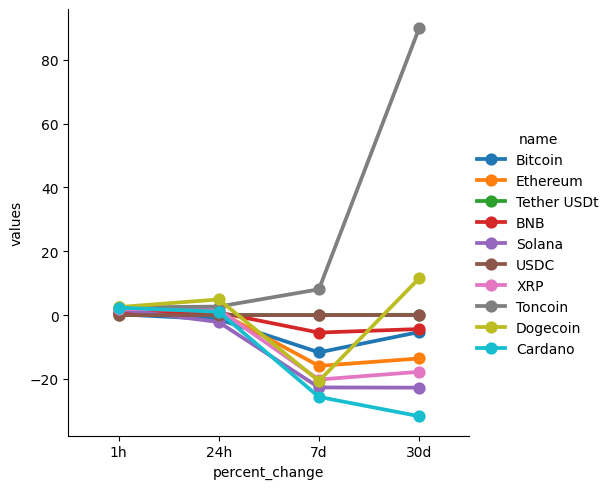

In [ ]:
sns.catplot(x='percent_change', y='values', hue='name', data=df6, kind='point')

In [ ]:
df6['percent_change'] = df6['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df6

,name,percent_change,values
0,Bitcoin,1h,0.24197
1,Bitcoin,24h,-1.33286
2,Bitcoin,7d,-11.69783
3,Bitcoin,30d,-5.31942
4,Ethereum,1h,1.56981
5,Ethereum,24h,1.03431
6,Ethereum,7d,-15.92801
7,Ethereum,30d,-13.60518
8,Tether USDt,1h,-0.01957
9,Tether USDt,24h,0.00742


In [ ]:
df7 = df[['name', 'quote.USD.price', 'timestamp']]
df7 = df7.query("name=='Bitcoin'")
df7

,name,quote.USD.price,timestamp
0,Bitcoin,63344.31798,2024-04-15 20:01:34.199214


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

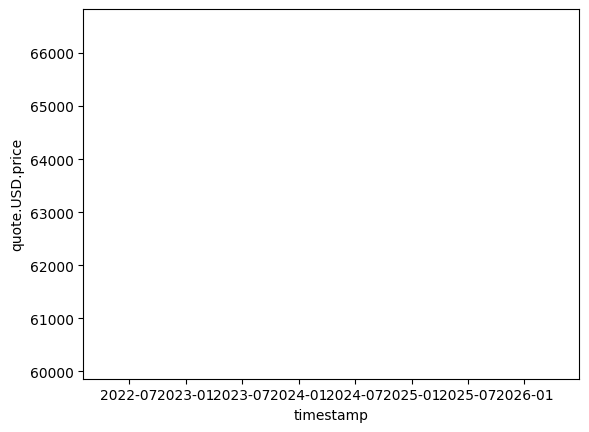

In [ ]:
sns.lineplot(x='timestamp', y='quote.USD.price', data=df7)